<a href="https://colab.research.google.com/github/IsabelaAyres/datascience/blob/main/MVP_Machine_Learning_and_Analytic/MVP_Machine_Learning_e_Analytics_Isabela_Ayres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP de Machine Learning & Analytics

>**PUC-Rio**
>
>**Pós-Graduação em Ciência de Dados e Analytics**
>
>**Aluna: Isabela Ayres**

# MACHINE LEARNING


---

Utilizando a Classificação para a Detecção de Fraudes em Cartão de Crédito

## 1. Definição do Problema


### 1.1 Contexto

Dentro do Machine Learning, existem diversos métodos e técnicas, e dois dos mais utilizados são a classificação e a regressão. A classificação consiste em atribuir rótulos a um conjunto de dados com base em características ou atributos específicos. Já a regressão busca prever um valor contínuo com base em variáveis independentes.

Neste trabalho, o foco será utilizar a classificação para combater um problema que afeta milhões de pessoas em todo o mundo: a fraude em cartões de crédito.

Ao aplicar técnicas de classificação, é possível analisar padrões e comportamentos presentes nos dados das transações, levando em consideração informações como valor da compra, localização geográfica, histórico do cliente e outros fatores relevantes. Com base nesses padrões identificados, um modelo de Machine Learning pode ser treinado para classificar transações como legítimas ou fraudulentas, permitindo uma detecção mais rápida e eficiente de atividades suspeitas.





### 1.2 Escolha do dataset

O dataset usado neste projeto será o **fraud transactions dataset**, referente a dados fictícios para simular situações de compra em cartões de crédito, com objetivo de classificar as transações como Reais ou Fraudulentas.

O dataset pode ser acessado [aqui](https://www.kaggle.com/datasets/dermisfit/fraud-transactions-dataset?select=fraudTrain.csv).

### 1.3 Informações sobre os atributos

O dataset possui 80.000 instâncias e 23 atributos, conforme descrições abaixo.

1. **trans_date_trans_time**: data e hora da transação
2. **cc_num**: número do cartão de crédito
3. **merchant**: comerciante que estava sendo pago
4. **category**: em que área esse comerciante negocia
5. **amt**: quantia de dinheiro em dólares americanos
6. **first**: primeiro nome do titular do cartão
7. **last**: sobrenome do titular do cartão
8. **gender**: sexo do titular do cartão
9. **street**: rua da residência do titular do cartão
10. **city**: cidade de residência do titular do cartão
11. **state**: estado de residência do titular do cartão
12. **zip**: cep da residência do titular do cartão
13. **lat**: latitude do titular do cartão
14. **long**: longitude do titular do cartão
15. **city_pop**: população da cidade
16. **job**: comércio do titular do cartão
17. **dob**: data de nascimento do titular do cartão
18. **trans_num**: id da transação
19. **unix_time**: hora unix que é a hora calculada desde 1970 até hoje
20. **merch_lat**: latitude do comerciante
21. **merch_long**: longitude do comerciante
22. **is_fraud**: se a transação é fraudulenta(1) ou não(0)
23. **id**: identificação do registro no dataset



## 2. Preparação de dados

### 2.1 Imports

Começando pela importação das bibliotecas a serem utilizadas.

In [ ]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder # encoder para transformação categórica
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada

from sklearn.ensemble import ExtraTreesClassifier # ExtraTrees, para a Importância de Atributos
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
from sklearn.linear_model import LogisticRegression # Regressão Logística, para a Eliminação Recursiva de Atributos

from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM

from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.metrics import confusion_matrix # matriz de confusão
from sklearn.metrics import recall_score # recall

### 2.2 Carga

Será utilizado o pacote Pandas (Python Data Analysis Library) para carregar de um arquivo .xlsx disponível online.

In [ ]:
# Carregando um arquivo csv usando Pandas através de uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/IsabelaAyres/datascience/main/MVP_Machine_Learning_and_Analytics/fraud.xlsx"

# Lê o arquivo
df = pd.read_excel(url)
df.head()

id trans_date_trans_time            cc_num  \
0   0   2020-06-21 12:14:25  2291163933867240   
1   1   2020-06-21 12:14:33  3573030041201290   
2   2   2020-06-21 12:14:53  3598215285024750   
3   3   2020-06-21 12:15:15  3591919803438420   
4   4   2020-06-21 12:15:17  3526826139003040   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...       lat          long  \
0   Elliott      M            351 Darlene Green  ...  339659.0 -8.093550e+05   
1  Williams      F             3638 Marsh Union  ...  403207.0 -1.104360e+05   
2     Lopez      F         9333 Valentine Point  ...  406729.0 -7.353650e+05   
3  Williams      M  32941 Krystal Mill Apt. 552  ...  285697.0 -8.081910e+05   
4    Massey      M     5783 Evan Roads Apt. 465  ...  442529.0 -8.501700e+15   

   city_pop                     job        dob  \
0    333497     Mechanical engineer 1968-03-19   
1       302  Sales professional, IT 1990-01-17   
2     34496       Librarian, public 1970-10-21   
3     54767            Set designer 1987-07-25   
4      1126      Furniture designer 1955-07-06   

                          trans_num   unix_time     merch_lat   merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  3.398639e+07  -81200714.0   
1  324cc204407e99f51b0d6ca0055005e7  1371816873  3.945050e+16 -109960431.0   
2  c81755dbbbea9d5c77f094348a7579be  1371816893  4.049581e+06  -74196111.0   
3  2159175b9efe66dc301f149d3d5abf8c  1371816915  2.881240e+16  -80883061.0   
4  57ff021bd3f328f8738bb535c302a31b  1371816917  4.495915e+07  -85884734.0   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

In [ ]:
# Mostra as 10 últimas linhas do dataset
df.tail(10)

id trans_date_trans_time            cc_num  \
79990  79990   2020-07-19 12:21:57  3557442674264530   
79991  79991   2020-07-19 12:21:58  4260059589824230   
79992  79992   2020-07-19 12:22:08      503874407318   
79993  79993   2020-07-19 12:22:50  3533012926413100   
79994  79994   2020-07-19 12:23:00   213154573301411   
79995  79995   2020-07-19 12:24:58   371683116218417   
79996  79996   2020-07-19 12:25:21     4561892980175   
79997  79997   2020-07-19 12:25:31  2720433095629870   
79998  79998   2020-07-19 12:25:40   180017442990269   
79999  79999   2020-07-19 12:25:49  3502088871723050   

                                  merchant        category     amt  \
79990               fraud_Balistreri-Nader        misc_pos  201.31   
79991       fraud_Schoen, Nienow and Bauch   personal_care  194.73   
79992                 fraud_Lemke and Sons          travel    1.60   
79993                  fraud_Keeling-Crist        misc_pos  253.15   
79994               fraud_Eichmann-Kilback            home   80.35   
79995                     fraud_Jacobi Inc  health_fitness    1.36   
79996                   fraud_Nader-Maggio   personal_care   11.76   
79997                     fraud_Renner Ltd            home   32.53   
79998  fraud_Langosh, Wintheiser and Hyatt     food_dining   55.85   
79999                fraud_Schroeder Group  health_fitness   90.91   

             first      last gender                      street  ...  \
79990       Angela   Edwards      F           486 Wilkins Pines  ...   
79991        Aaron    Rogers      M    969 Huerta Path Apt. 270  ...   
79992       Andrew     Mcgee      M  4130 Tiffany Glen Apt. 562  ...   
79993        Megan   Bernard      F             128 Nathan Ramp  ...   
79994  Christopher  Sheppard      M          39218 Baker Shoals  ...   
79995        Debra    Becker      F          384 Jonathan Hills  ...   
79996   Jacqueline     Allen      F              166 Lisa Fords  ...   
79997         Mark      Wood      M   854 Walker Dale Suite 488  ...   
79998     Michelle  Anderson      F          28311 Dennis Trace  ...   
79999        Scott    Martin      M  31472 Cody Place Suite 740  ...   

            lat       long  city_pop                                    job  \
79990  398013.0  -828125.0       460             Lecturer, higher education   
79991  428062.0 -1006215.0      4005                       Network engineer   
79992  295894.0  -985201.0   1595797                    Exhibition designer   
79993  432237.0  -751612.0      1684                             IT trainer   
79994  381981.0  -866821.0       965                Horticultural therapist   
79995  405716.0  -743167.0     18459  Emergency planning/management officer   
79996   39596.0  -861309.0     78968                      Financial adviser   
79997  440575.0  -699656.0      3224                  Engineer, electronics   
79998  426853.0  -738253.0    151022                      Designer, textile   
79999  390298.0  -770793.0     19054                   Operations geologist   

             dob                         trans_num   unix_time     merch_lat  \
79990 2004-06-19  86aadbcc0db7c8a73f6abba441eba3e4  1374236517  3.880628e+07   
79991 1945-03-15  f47052d3a95b5d5a00f7ddfe00bc017f  1374236518  4.272525e+16   
79992 1975-12-28  9834afdf2cebe1c6fe7034494c081416  1374236528  2.889171e+07   
79993 1994-03-01  7a5a76dc410e877bedf0a8a83c0d8bd1  1374236570  4.375244e+07   
79994 1982-02-10  94b23fa87020f579193cc6dc34d124c2  1374236580  3.746334e+16   
79995 1929-03-19  5a8919f0560d6936069b0edf04f65690  1374236698  3.989493e+07   
79996 1968-02-10  2b2e42c8771bbc447d48642e887b15da  1374236721  4.024500e+16   
79997 1997-08-22  18661fc99af762a26b2ee79368d2e4dd  1374236731  4.473255e+07   
79998 1939-06-01  828d78ea523cede5697732018a613ab7  1374236740  4.356917e+06   
79999 1976-09-08  1e0a4d0172e0831f94c28a6ac8acce71  1374236749  3.952279e+07   

         merch_long  is_fraud  
79990 -8.181352e+06         0  
79991 -1.01532

In [ ]:
# Mostra as informações do dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     80000 non-null  int64         
 1   trans_date_trans_time  80000 non-null  datetime64[ns]
 2   cc_num                 80000 non-null  int64         
 3   merchant               80000 non-null  object        
 4   category               80000 non-null  object        
 5   amt                    80000 non-null  float64       
 6   first                  80000 non-null  object        
 7   last                   80000 non-null  object        
 8   gender                 80000 non-null  object        
 9   street                 80000 non-null  object        
 10  city                   80000 non-null  object        
 11  state                  80000 non-null  object        
 12  zip                    80000 non-null  int64         
 13  l

In [ ]:
# Verificando nulls no dataset
df.isnull().sum()

id                       0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
# Verificando o total de fraudes
df_counts = df.is_fraud.value_counts().reset_index(name="Count").rename(columns={'index':'is_fraud'})
df_counts[df_counts["is_fraud"] == 1.0].Count
df_counts["Percentage"] = df_counts["Count"]/len(df) * 100
df_counts

is_fraud  Count  Percentage
0         0  79697    99.62125
1         1    303     0.37875

### 2.3 Feature selection

Vamos iniciar o processo de Feature Selection removendo algumas colunas desnecessárias.

In [ ]:
# Eliminando colunas desnecessárias e redundantes

df = df.drop('id',axis=1)
df = df.drop('first',axis=1)
df = df.drop('last',axis=1)
df = df.drop('street',axis=1)
df = df.drop('city',axis=1)
df = df.drop('state',axis=1)
df = df.drop('trans_num',axis=1)

df

trans_date_trans_time            cc_num  \
0       2020-06-21 12:14:25  2291163933867240   
1       2020-06-21 12:14:33  3573030041201290   
2       2020-06-21 12:14:53  3598215285024750   
3       2020-06-21 12:15:15  3591919803438420   
4       2020-06-21 12:15:17  3526826139003040   
...                     ...               ...   
79995   2020-07-19 12:24:58   371683116218417   
79996   2020-07-19 12:25:21     4561892980175   
79997   2020-07-19 12:25:31  2720433095629870   
79998   2020-07-19 12:25:40   180017442990269   
79999   2020-07-19 12:25:49  3502088871723050   

                                   merchant        category    amt gender  \
0                     fraud_Kirlin and Sons   personal_care   2.86      M   
1                      fraud_Sporer-Keebler   personal_care  29.84      F   
2      fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28      F   
3                         fraud_Haley Group        misc_pos  60.05      M   
4                     fraud_Johnston-Casper          travel   3.19      M   
...                                     ...             ...    ...    ...   
79995                      fraud_Jacobi Inc  health_fitness   1.36      F   
79996                    fraud_Nader-Maggio   personal_care  11.76      F   
79997                      fraud_Renner Ltd            home  32.53      M   
79998   fraud_Langosh, Wintheiser and Hyatt     food_dining  55.85      F   
79999                 fraud_Schroeder Group  health_fitness  90.91      M   

         zip       lat          long  city_pop  \
0      29209  339659.0 -8.093550e+05    333497   
1      84002  403207.0 -1.104360e+05       302   
2      11710  406729.0 -7.353650e+05     34496   
3      32780  285697.0 -8.081910e+05     54767   
4      49632  442529.0 -8.501700e+15      1126   
...      ...       ...           ...       ...   
79995   8830  405716.0 -7.431670e+05     18459   
79996  46143   39596.0 -8.613090e+05     78968   
79997   4287  440575.0 -6.996560e+05      3224   
79998  12222  426853.0 -7.382530e+05    151022   
79999  20895  390298.0 -7.707930e+05     19054   

                                         job        dob   unix_time  \
0                        Mechanical engineer 1968-03-19  1371816865   
1                     Sales professional, IT 1990-01-17  1371816873   
2                          Librarian, public 1970-10-21  1371816893   
3                               Set designer 1987-07-25  1371816915   
4                         Furniture designer 1955-07-06  1371816917   
...                                      ...        ...         ...   
79995  Emergency planning/management officer 1929-03-19  1374236698   
79996                      Financial adviser 1968-02-10  1374236721   
79997                  Engineer, electronics 1997-08-22  1374236731   
79998                      Designer, textile 1939-06-01  1374236740   
79999                   Operations geologist 1976-09-08  1374236749   

          merch_lat   merch_long  is_fraud  
0      3.398639e+07  -81200714.0         0  
1      3.945050e+16 -109960431.0         0  
2      4.049581e+06  -74196111.0         0  
3      2.881240e+16  -80883061.0         0  
4      4.495915e+07  -85884734.0         0  
...             ...          ...       ...  
79995  3.989493e+07  -73697728.0         0  
79996  4.024500e+16   -8601224.0         0  
79997  4.473255e+07  -70930223.0         0  
79998  4.356917e+06  -72860978.0         0  
79999  3.952279e+07   -7781671.0         0  

[80000 rows x 16 columns]

Agora, vamos aplicar uma transformação categórica para que seja possível considerar as variáveis Categóricas no modelo.

In [ ]:
# Transformações categóricas

# Separando as colunas para transformação
cat_cols = ['merchant', 'category', 'job', 'gender', 'trans_date_trans_time', 'dob']

# Definindo o transformador como Label Encoding
le = LabelEncoder()

# Transformando os dados
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

Vamos agora aplicar três métodos de Feature Selection para decidir quais atributos utilizar nos modelos.

In [ ]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
array = df.values
X = array[:,0:15] # atributos
y = array[:,15] # classe (target)

In [ ]:
# Método1: SelectKBest

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=4)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", df.columns[0:15])

# Exibe as pontuações de cada atributos e os 4 escolhidas (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=df.columns[0:15]))


Número original de atributos: 15

Número reduzido de atributos: 4

Atributos Originais: Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'unix_time',
       'merch_lat', 'merch_long'],
      dtype='object')

Scores dos Atributos Originais: [1.404e+00 1.060e+01 2.438e-03 2.356e+01 2.780e+03 7.836e-01 1.450e+01
 4.941e+01 7.957e+00 4.196e+00 4.257e+00 9.824e+00 1.303e+00 2.966e-02
 9.216e-01]

Atributos Selecionados: ['category' 'amt' 'zip' 'lat']


In [ ]:
# Método2: Eliminação Recursiva de Atributos

# Criação do modelo
modelo = LogisticRegression(max_iter=200)

# Eliminação Recursiva de Atributos
rfe = RFE(modelo, n_features_to_select=4)
fit = rfe.fit(X, y)

# Print dos resultados
print("Atributos Originais:", df.columns[0:15])

# Exibe os atributos selecionados (marcados como True em "Atributos Selecionados"
# e com valor 1 em "Ranking dos Atributos")
print("\nAtributos Selecionados: %s" % fit.support_)
print("\nRanking de atributos: %s" % fit.ranking_)
print("\nQtd de melhores Atributos: %d" % fit.n_features_)
print("\nNomes dos Atributos Selecionados: %s" % fit.get_feature_names_out(input_features=df.columns[0:15]))

Atributos Originais: Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'unix_time',
       'merch_lat', 'merch_long'],
      dtype='object')

Atributos Selecionados: [False False False False False False False False False False False  True
  True  True  True]

Ranking de atributos: [12 11 10  9  8  7  6  5  4  3  2  1  1  1  1]

Qtd de melhores Atributos: 4

Nomes dos Atributos Selecionados: ['dob' 'unix_time' 'merch_lat' 'merch_long']


In [ ]:
# Método3: Importância de Atributos com ExtraTrees

# Criação do modelo para seleção de atributos
modelo = ExtraTreesClassifier(n_estimators=100)
modelo.fit(X,y)

# Exibe os atributos orginais
print("\nAtributos Originais:", df.columns[0:15])

# Exibe a pontuação de importância para cada atributo (quanto maior a pontuação, mais importante é o atributo).
print(modelo.feature_importances_)


Atributos Originais: Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'unix_time',
       'merch_lat', 'merch_long'],
      dtype='object')
[0.078 0.05  0.04  0.053 0.276 0.015 0.053 0.068 0.039 0.051 0.052 0.055
 0.079 0.043 0.046]


> Vimos que os métodos SelectKBest e Eliminação Recursiva de Atributos retornam atributos diferentes. Considerando o método de Importância de Atributos com ExtraTrees, conseguimos finalmente definir os melhores atributos para aplicação nos modelos, sendo eles: 'amt', 'trans_date_trans_time', 'lat', 'dob', 'category' e 'job'.

In [ ]:
# Selecionando colunas necessárias para a análise
df_final = df[['amt', 'trans_date_trans_time', 'lat', 'dob', 'category', 'job', 'is_fraud']]

In [ ]:
df_final

amt  trans_date_trans_time       lat  dob  category  job  is_fraud
0       2.86                      0  339659.0  370        10  275         0
1      29.84                      1  403207.0  751        10  391         0
2      41.28                      2  406729.0  412         5  259         0
3      60.05                      3  285697.0  709         9  406         0
4       3.19                      4  442529.0  175        13  196         0
...      ...                    ...       ...  ...       ...  ...       ...
79995   1.36                  78531  405716.0   14         5  143         0
79996  11.76                  78532   39596.0  369        10  187         0
79997  32.53                  78533  440575.0  856         6  157         0
79998  55.85                  78534  426853.0   54         1  122         0
79999  90.91                  78535  390298.0  523         5  308         0

[80000 rows x 7 columns]

## 3. Modelagem e treinamento


Nesta etapa, iremos realizar a divisão dos dados em conjuntos de treinamento e teste e aplicar diferentes modelos para análise.

In [ ]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
array = df_final.values
X = array[:,0:6] # atributos
y = array[:,6] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10) # faz a divisão

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=10) # faz o particionamento em 10 folds

KNN: 0.997453 (0.000613)
CART: 0.997453 (0.000528)
NB: 0.976922 (0.002763)
SVM: 0.996312 (0.000734)


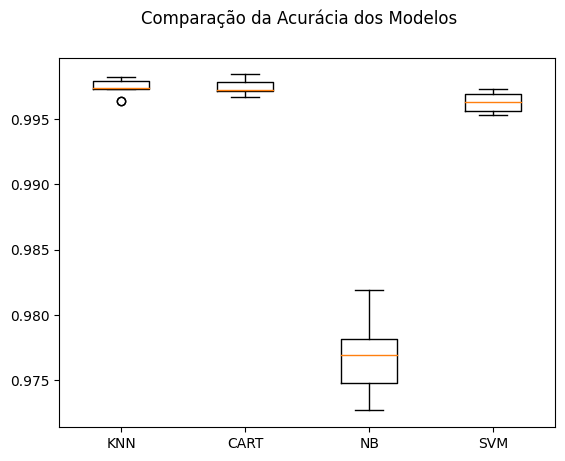

In [ ]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(10)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy', error_score='raise')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

A acurácia de todos os modelos testados é, em geral, bastante alta. No entanto, é importante destacar que nosso dataset possui uma proporção significativamente maior de casos de não fraude em relação aos casos de fraude - o que é comum para a situação em questão. Nosso principal objetivo é lidar com a classe que possui muito menos registros, ou seja, os casos de fraude. Nesse contexto, a acurácia não é a métrica mais adequada para avaliar o desempenho dos modelos na previsão dessa classe.

Para melhorar a decisão sobre o melhor modelo, faremos uso de outras métricas, como a Matriz de Confusão e o Recall

In [ ]:
# Fazendo as predições para cada modelo

#KNN
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
predictionsKNN = KNN.predict(X_test)

#CART
CART = DecisionTreeClassifier()
CART.fit(X_train, y_train)
predictionsCART = CART.predict(X_test)

#NB
NB = GaussianNB()
NB.fit(X_train, y_train)
predictionsNB = NB.predict(X_test)

#SVM
SVM = SVC()
SVM.fit(X_train, y_train)
predictionsSVM = SVM.predict(X_test)

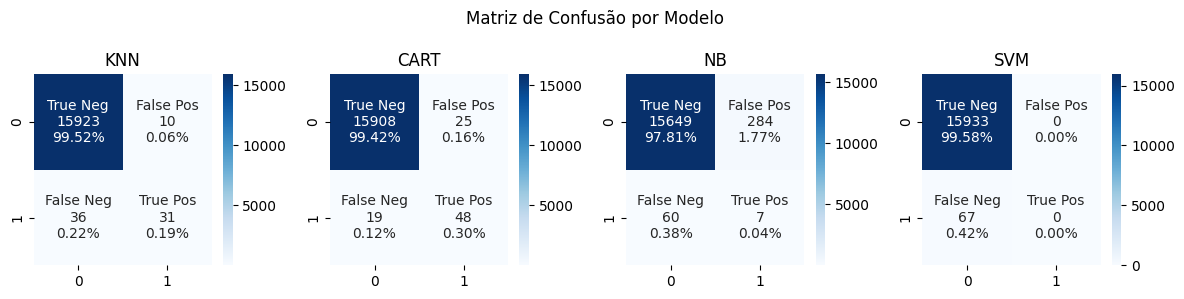

In [ ]:
# Criando matriz de confusão para cada modelo
cf_matrixKNN = confusion_matrix(y_test, predictionsKNN)
cf_matrixCART = confusion_matrix(y_test, predictionsCART)
cf_matrixNB = confusion_matrix(y_test, predictionsNB)
cf_matrixSVM = confusion_matrix(y_test, predictionsSVM)


# Vizualizando a matriz de confusão formatada para cada modelo
fig, ax = plt.subplots(figsize=(12,3), nrows=1, ncols=4)

# Cria gráfico formatado KNN
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrixKNN.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixKNN.flatten()/np.sum(cf_matrixKNN)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

axKNN = ax[0]
sns.heatmap(cf_matrixKNN, annot=labels, fmt='', cmap='Blues', ax=axKNN)
axKNN.set_title('KNN')

# Cria gráfico formatado CART
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrixCART.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixCART.flatten()/np.sum(cf_matrixCART)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

axCART = ax[1]
sns.heatmap(cf_matrixCART, annot=labels, fmt='', cmap='Blues', ax=axCART)
axCART.set_title('CART')

# Cria gráfico formatado NB
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrixNB.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixNB.flatten()/np.sum(cf_matrixNB)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

axNB = ax[2]
sns.heatmap(cf_matrixNB, annot=labels, fmt='', cmap='Blues', ax=axNB)
axNB.set_title('NB')

# Cria gráfico formatado SVM
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrixSVM.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixSVM.flatten()/np.sum(cf_matrixSVM)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

axSVM = ax[3]
sns.heatmap(cf_matrixSVM, annot=labels, fmt='', cmap='Blues', ax=axSVM)
axSVM.set_title('SVM')

fig.suptitle('Matriz de Confusão por Modelo')
plt.tight_layout()

In [ ]:
# Calculando o recall para cada modelo
predictions = []

predictions.append((recall_score(y_test, predictionsKNN)))
predictions.append((recall_score(y_test, predictionsCART)))
predictions.append((recall_score(y_test, predictionsNB)))
predictions.append((recall_score(y_test, predictionsSVM)))

print(predictions)

[0.4626865671641791, 0.7164179104477612, 0.1044776119402985, 0.0]


## 4. Avaliação de Resultados


Ao realizar a avaliação dos modelos de Machine Learning aplicados, podemos observar resultados que nos levam a considerar o KNN como o mais adequado em termos de acurácia. No entanto, é fundamental levar em conta as características específicas do problema de negócio antes de tomar uma decisão final.

Quando lidamos com a detecção de fraudes em transações de cartão de crédito, é comum que tenhamos uma quantidade muito maior de registros de transações legítimas do que de transações fraudulentas. Nesse contexto, métricas como a Matriz de Confusão e o Recall desempenham um papel fundamental na análise mais precisa dos modelos.

Através da análise da Matriz de Confusão, podemos observar que o modelo CART apresenta uma maior porcentagem de Verdadeiros Positivos. Isso significa que esse modelo tem uma capacidade superior em identificar corretamente as transações fraudulentas. Por sua vez, a análise do Recall, que mede a proporção de transações fraudulentas corretamente identificadas em relação ao total de fraudes, também confirma que o modelo CART apresenta os melhores resultados.

Dessa forma, considerando tanto a Matriz de Confusão quanto o Recall, podemos concluir que o modelo CART é o mais indicado para o problema em questão, por sua capacidade de identificar um maior número de fraudes em relação aos demais modelos.

# DEEP LEARNING


---

 Utilizando Redes Neurais para Identificação de Objetos em Imagens: Aplicação no Âmbito da Segurança do Trabalho

## 1. Definição do Problema


### 1.1 Contexto

O campo do Deep Learning tem revolucionado a forma como as máquinas processam e interpretam informações visuais. Com a capacidade de extrair características complexas e reconhecer padrões em imagens, o Deep Learning se destaca como uma poderosa técnica para a identificação de objetos em diferentes contextos.

Neste projeto, iremos explorar sua aplicação na identificação de pessoas sem Equipamentos de Proteção Individual (EPI), com foco específico na detecção de Capacetes de Segurança.

O Capacete de Segurança é um equipamento de extrema importância, projetado para proteger a cabeça contra impactos, objetos em queda e outros perigos presentes no ambiente de trabalho. Garantir que as pessoas estejam utilizando corretamente esse equipamento é essencial para prevenir acidentes graves e preservar a integridade física dos trabalhadores.

Com isso, o objetivo deste estudo é empregar técnicas de identificação de objetos em imagens, baseadas em Deep Learning, para identificar automaticamente pessoas sem Capacete de Segurança em um ambiente industrial.

Com a detecção automatizada, é possível tomar medidas imediatas, como enviar alertas para a equipe de segurança ou acionar dispositivos de aviso sonoro, para evitar acidentes e garantir a segurança das pessoas.

## 2. Setup

### 2.1 Imports

Começando pela importação das bibliotecas a serem utilizadas.

In [ ]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para executar a inferência no módulo TF-Hub
import tensorflow as tf
import tensorflow_hub as hub

# Para baixar a imagem
import matplotlib.pyplot as plt
import tempfile
from six.moves.urllib.request import urlopen
from six import BytesIO

# Para desenhar na imagem
import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

# Para medir o tempo de inferência
import time

# Imprimir a versão do Tensorflow
print(tf.__version__)

2.12.0


### 2.2 Criação de funções


A seguir, vamos criar as funções responsáveis por processar a imagem e desenhar as bounding boxes.

In [ ]:
# Exibe a imagem
def display_image(image):
  fig = plt.figure(figsize=(20, 15))
  plt.grid(False)
  plt.imshow(image)

# Faz o download e redimensiona a imagem
def download_and_resize_image(url, new_width=256, new_height=256,
                              display=False):
  _, filename = tempfile.mkstemp(suffix=".jpg")
  response = urlopen(url)
  image_data = response.read()
  image_data = BytesIO(image_data)
  pil_image = Image.open(image_data)
  pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS)
  pil_image_rgb = pil_image.convert("RGB")
  pil_image_rgb.save(filename, format="JPEG", quality=90)
  print("Image downloaded to %s." % filename)
  if display:
    display_image(pil_image)
  return filename


# Adiciona uma bounding box à imagem
def draw_bounding_box_on_image(image,
                               ymin,
                               xmin,
                               ymax,
                               xmax,
                               color,
                               font,
                               thickness=4,
                               display_str_list=()):
  draw = ImageDraw.Draw(image)
  im_width, im_height = image.size
  (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                ymin * im_height, ymax * im_height)
  draw.line([(left, top), (left, bottom), (right, bottom), (right, top),
             (left, top)],
            width=thickness,
            fill=color)


  display_str_heights = [font.getsize(ds)[1] for ds in display_str_list]


  total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)

  if top > total_display_str_height:
    text_bottom = top
  else:
    text_bottom = top + total_display_str_height


  for display_str in display_str_list[::-1]:
    text_width, text_height = font.getsize(display_str)
    margin = np.ceil(0.05 * text_height)
    draw.rectangle([(left, text_bottom - text_height - 2 * margin),
                    (left + text_width, text_bottom)],
                   fill=color)
    draw.text((left + margin, text_bottom - text_height - margin),
              display_str,
              fill="black",
              font=font)
    text_bottom -= text_height - 2 * margin


# Sobrepõe caixas delimitadoras rotuladas em uma imagem com pontuações formatadas e nomes de classe
def draw_boxes(image, boxes, class_names, scores, max_boxes=10, min_score=0.30):
  colors = list(ImageColor.colormap.values())

  try:
    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf",
                              25)
  except IOError:
    print("Font not found, using default font.")
    font = ImageFont.load_default()

  for i in range(min(boxes.shape[0], max_boxes)):
    if scores[i] >= min_score:
      ymin, xmin, ymax, xmax = tuple(boxes[i])
      display_str = "{}: {}%".format(class_names[i].decode("ascii"),
                                     int(100 * scores[i]))
      color = colors[hash(class_names[i]) % len(colors)]
      image_pil = Image.fromarray(np.uint8(image)).convert("RGB")
      draw_bounding_box_on_image(
          image_pil,
          ymin,
          xmin,
          ymax,
          xmax,
          color,
          font,
          display_str_list=[display_str])
      np.copyto(image, np.array(image_pil))
  return image

## 3. Modelagem e treinamento


Podemos utilizar duas redes neurais diferentes para detecção de objetos:

*   **FasterRCNN+InceptionResNet V2**: melhor acurácia
*   **ssd+mobilenet V2**: pequena e rápida para inferência

Vamos usar o Tensorflow Hub para download de modelos pré-treinados.


In [ ]:
module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1" #@param ["https://tfhub.dev/google/openimages_v4/ssd/mobilenet_v2/1", "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"]

detector = hub.load(module_handle).signatures['default']

Com o objetivo de identificar pessoas sem capacete, iremos utilizar duas imagens de exemplo: uma em que todas as pessoas estejam utilizando capacete e outra em que haja pelo menos uma pessoa sem capacete.

Image downloaded to /tmp/tmpclfin45y.jpg.


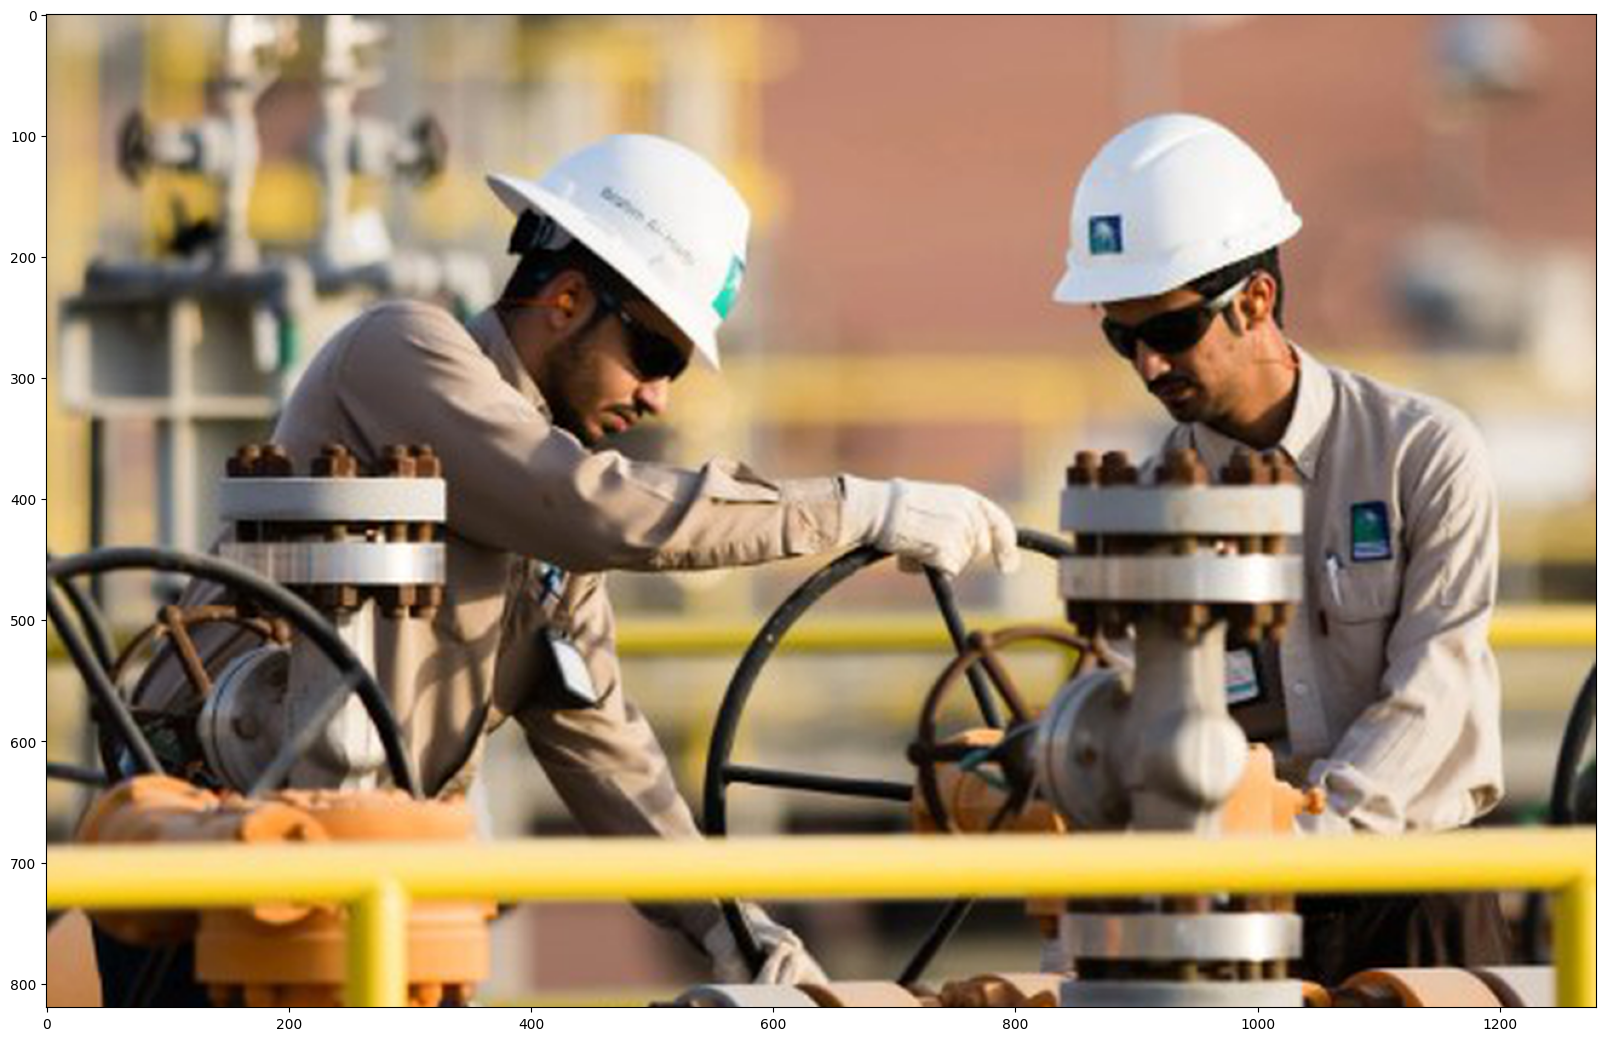

In [ ]:
# Carregando a imagem (URL da imagem na web: https://epbr.com.br/preco-do-petroleo-ainda-resiste-a-pressao-da-opep/)
image_url = "https://raw.githubusercontent.com/IsabelaAyres/datascience/main/MVP_Machine_Learning_and_Analytics/picture1.jpg"
downloaded_image_path = download_and_resize_image(image_url, 1280, 820, True)

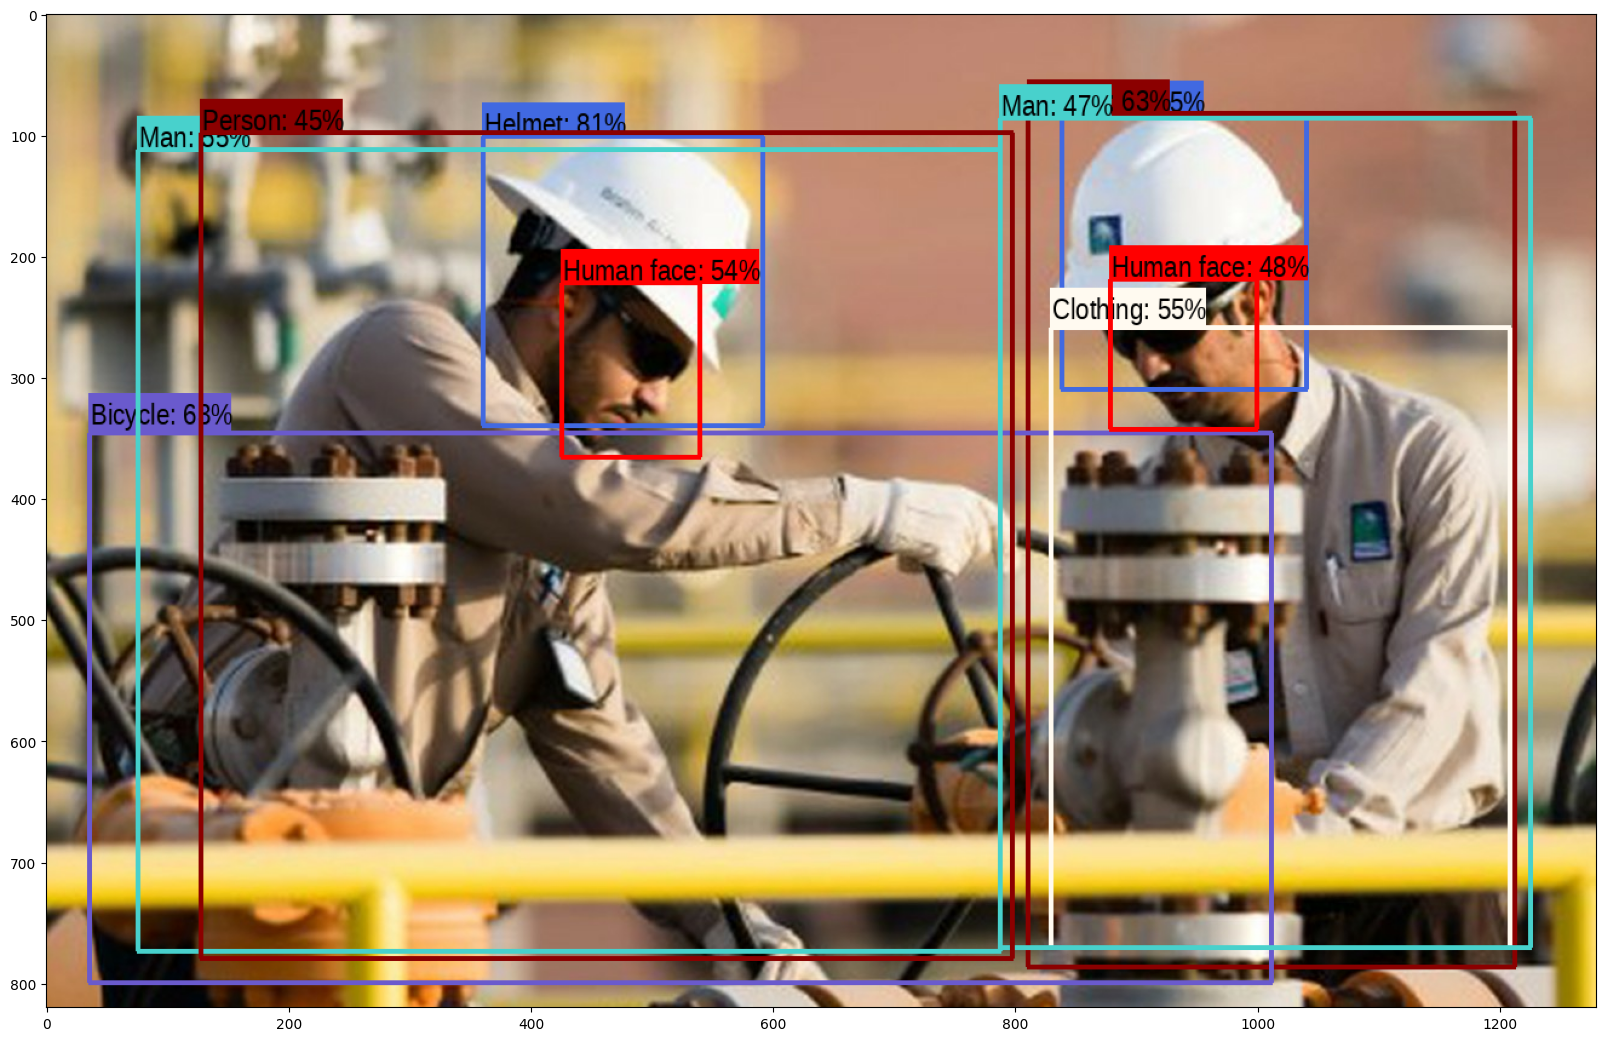

In [ ]:
def load_img(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  return img

def run_detector(detector, path):
  # Carregando imagem
  img = load_img(path)

  # Detectando objetos
  converted_img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]
  start_time = time.time()
  result = detector(converted_img)
  end_time = time.time()
  result = {key:value.numpy() for key,value in result.items()}

  # Desenhado boxes na imagem
  image_with_boxes = draw_boxes(
     img.numpy(), result["detection_boxes"],
     result["detection_class_entities"], result["detection_scores"])

  # Mostrando a imagem com os objetos identificados
  display_image(image_with_boxes)

  # Salvando lista de objetos identificados e transformando em tabela
  result_object = result['detection_class_entities']
  result_score = result['detection_scores']
  result_table = pd.DataFrame(
      {'list_object': result_object,
       'list_score': result_score})

  # Corrigindo o formato do dado
  result_table.list_object = result_table.list_object.astype(str)

  # Limpando caracteres
  result_table['list_object'] = result_table['list_object'].str.replace("b'", '').str.replace("'", '')

  # Selecionando range de score
  result_table = result_table[result_table['list_score'] > 0.30]

  # Contando objetos tipo Pessoas e Capacetes
  result_table = result_table.drop('list_score',axis=1)
  result_table_person = result_table[result_table['list_object'] == 'Person'].value_counts().values
  result_table_helmet = result_table[result_table['list_object'] == 'Helmet'].value_counts().values

  # Mensagem de alerta
  if result_table_person == result_table_helmet:
    result_table = pd.DataFrame(
    {'Mensagem': "Operação segura",
    'Total Pessoas': result_table_person,
    'Total Capacetes': result_table_helmet})

    display(result_table.style.set_properties(**{'background-color': 'green', 'color': 'white'}).set_caption('ANÁLISE'))

  else:
    result_table = pd.DataFrame(
    {'Mensagem': "Atenção! Falta de Capacete localizada",
    'Total Pessoas': result_table_person,
    'Total Capacetes': result_table_helmet})

    display(result_table.style.set_properties(**{'background-color': 'red', 'color': 'white'}).set_caption('ANÁLISE'))

run_detector(detector, downloaded_image_path)

Agora vamos para um exemplo com pessoas sem capacete.

Image downloaded to /tmp/tmpzadzjs6a.jpg.


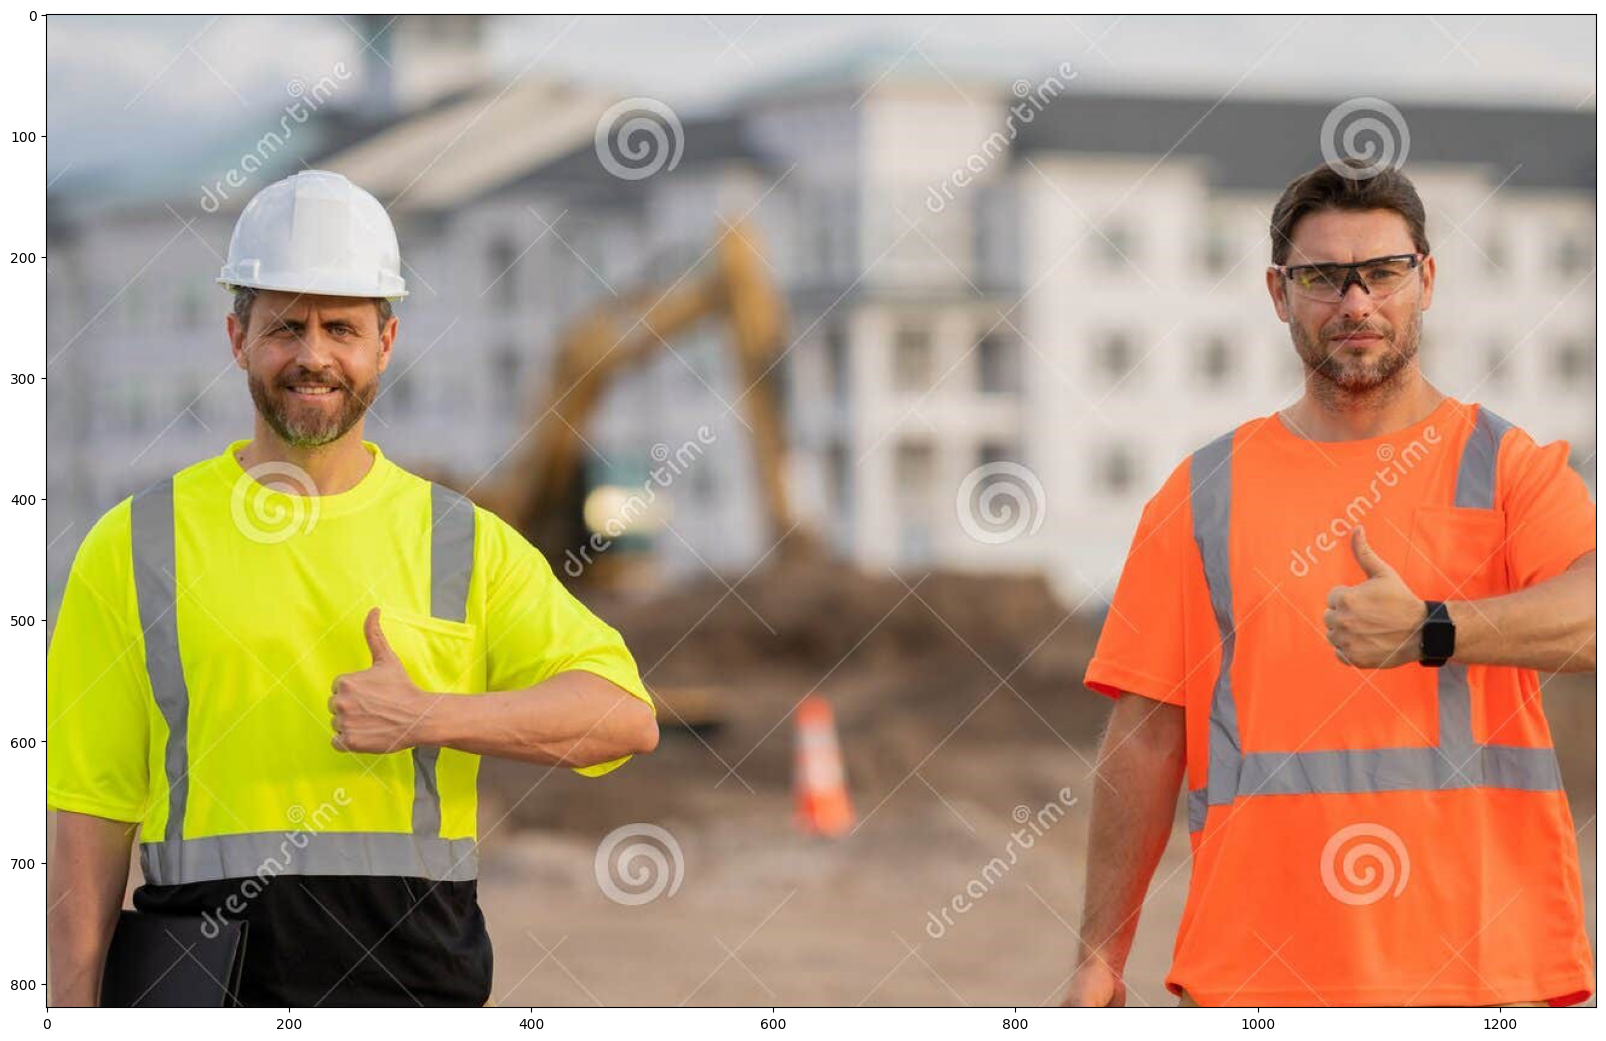

In [ ]:
# Carregando a imagem (URL da imagem na web: https://pt.dreamstime.com/trabalhadores-de-canteiros-obras-capacete-dois-um-chap%C3%A9u-r%C3%ADgido-%C3%A9-respons%C3%A1vel-por-garantir-seguran%C3%A7a-enquanto-durante-image278472385)
image_url = "https://raw.githubusercontent.com/IsabelaAyres/datascience/main/MVP_Machine_Learning_and_Analytics/picture2.jpg"
downloaded_image_path = download_and_resize_image(image_url, 1280, 820, True)

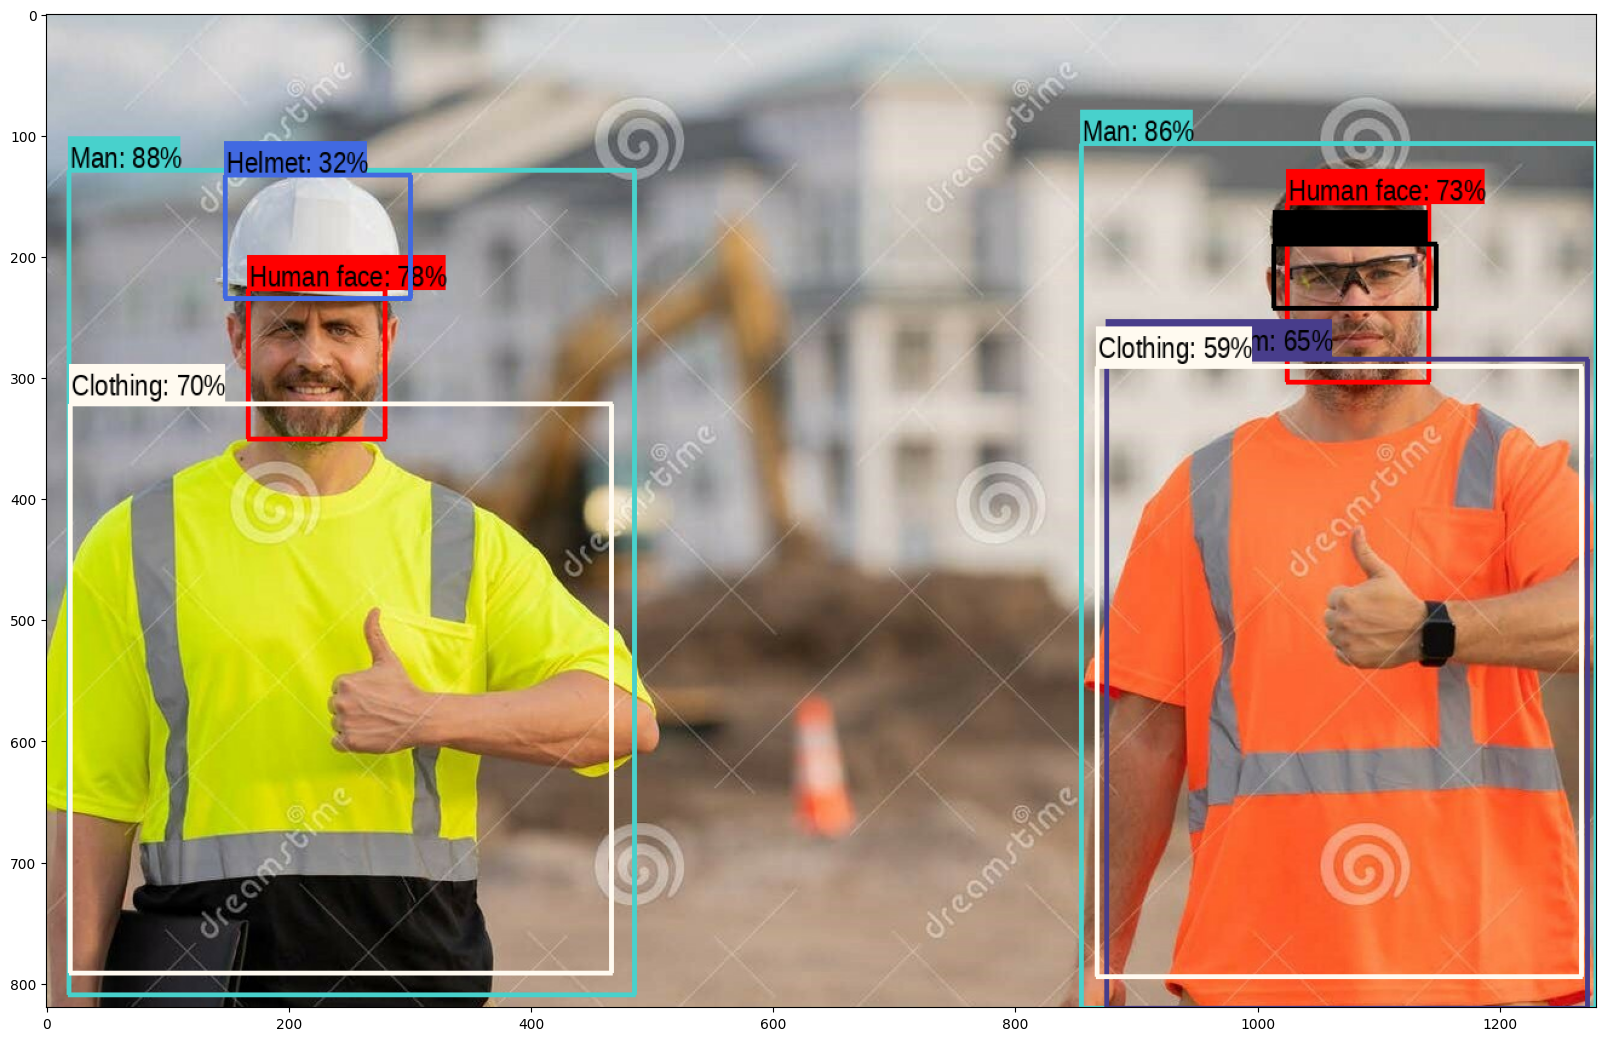

In [ ]:
def load_img(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  return img

def run_detector(detector, path):
  # Carregando imagem
  img = load_img(path)

  # Detectando objetos
  converted_img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]
  start_time = time.time()
  result = detector(converted_img)
  end_time = time.time()
  result = {key:value.numpy() for key,value in result.items()}

  # Desenhado boxes na imagem
  image_with_boxes = draw_boxes(
     img.numpy(), result["detection_boxes"],
     result["detection_class_entities"], result["detection_scores"])

  # Mostrando a imagem com os objetos identificados
  display_image(image_with_boxes)

  # Salvando lista de objetos identificados e transformando em tabela
  result_object = result['detection_class_entities']
  result_score = result['detection_scores']
  result_table = pd.DataFrame(
      {'list_object': result_object,
       'list_score': result_score})

  # Corrigindo o formato do dado
  result_table.list_object = result_table.list_object.astype(str)

  # Limpando caracteres
  result_table['list_object'] = result_table['list_object'].str.replace("b'", '').str.replace("'", '')

  # Selecionando range de score
  result_table = result_table[result_table['list_score'] > 0.10]

  # Contando objetos tipo Pessoas e Capacetes
  result_table = result_table.drop('list_score',axis=1)
  result_table_person = result_table[result_table['list_object'] == 'Person'].value_counts().values
  result_table_helmet = result_table[result_table['list_object'] == 'Helmet'].value_counts().values

  # Mensagem de alerta
  if result_table_person == result_table_helmet:
    result_table = pd.DataFrame(
    {'Mensagem': "Operação segura",
    'Total Pessoas': result_table_person,
    'Total Capacetes': result_table_helmet})

    display(result_table.style.set_properties(**{'background-color': 'green', 'color': 'white'}).set_caption('ANÁLISE'))

  else:
    result_table = pd.DataFrame(
    {'Mensagem': "Atenção! Falta de Capacete localizada",
    'Total Pessoas': result_table_person,
    'Total Capacetes': result_table_helmet})

    display(result_table.style.set_properties(**{'background-color': 'red', 'color': 'white'}).set_caption('ANÁLISE'))

run_detector(detector, downloaded_image_path)

## 4. Avaliação de Resultados


Neste estudo, foi utilizada a detecção de objetos em imagens para identificar pessoas sem capacete de proteção em um ambiente de trabalho. Os resultados obtidos foram satisfatórios, permitindo uma identificação eficiente dos indivíduos sem capacete.

No entanto, é importante destacar que existem oportunidades de melhoria. Durante os testes, foi observado que o modelo apresenta maior precisão na detecção de capacetes quando eles são de cor branca. Além disso, o ângulo do capacete na imagem afeta o score de acerto na detecção, o que abre espaço para aprimoramentos no treinamento do modelo levando em conta diferentes cores, ângulos e posições do capacete.

Além disso, uma sugestão interessante para aprimorar ainda mais a utilidade da solução seria integrar o modelo a um sistema de alerta sonoro. Dessa forma, além da detecção visual, um alerta sonoro poderia ser acionado, fornecendo uma camada adicional de segurança e prevenção de acidentes.

Em resumo, apesar dos pontos de melhoria, os resultados obtidos nesse estudo demonstraram uma eficiente detecção de pessoas sem capacete em ambiente de trabalho, podendo servir como ponto de partida para implementações no âmbito da Segurança do Trabalho em Indústrias.